In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [17]:
file_path = 'heart_failure_clinical_records.csv'
data = pd.read_csv(file_path)


In [23]:
# # Quick data analysis
# print(data.describe())

# # Check for outliers
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=data)
# plt.title('Boxplot of Features')
# plt.xticks(rotation=90)
# plt.show()

# # Split the dataset into train and test
# X = data.drop('DEATH_EVENT', axis=1)
# y = data['DEATH_EVENT']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train three models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

original_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    original_results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "report": classification_report(y_test, y_pred)
    }

# Add artificial outliers
def add_outliers(data, num_outliers=50):
    outliers = data.sample(num_outliers, random_state=42)
    outliers = outliers.applymap(lambda x: x * 10 if np.issubdtype(type(x), np.number) else x)
    data_with_outliers = pd.concat([data, outliers], ignore_index=True)
    return data_with_outliers



c:\Users\Agnieszka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Agnieszka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Agnieszka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [20]:
data_with_outliers = add_outliers(data)

# Split the dataset with outliers into train and test
X = data_with_outliers.drop('DEATH_EVENT', axis=1)
y = data_with_outliers['DEATH_EVENT']
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models on data with outliers
outlier_results = {}

for name, model in models.items():
    model.fit(X_train_outliers, y_train_outliers)
    y_pred = model.predict(X_test_outliers)
    outlier_results[name] = {
        "accuracy": np.round(accuracy_score(y_test_outliers, y_pred), 3),
        "report": classification_report(y_test_outliers, y_pred)
    }

# Compare the results
for name in models.keys():
    print(f"Results for {name} on original data:")
    print(f"Accuracy: {original_results[name]['accuracy']}")
    print(f"Classification Report:\n{original_results[name]['report']}")
    
    print(f"Results for {name} on data with outliers:")
    print(f"Accuracy: {outlier_results[name]['accuracy']}")
    print(f"Classification Report:\n{outlier_results[name]['report']}")
    print("="*60)

Results for RandomForest on original data:
Accuracy: 0.992
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.99      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Results for RandomForest on data with outliers:
Accuracy: 0.989
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       697
           1       0.98      0.99      0.99       311
          10       0.50      1.00      0.67         2

    accuracy                           0.99      1010
   macro avg       0.83      0.99      0.88      1010
weighted avg       0.99      0.99      0.99      1010

Results for LogisticRegression on original data:
Accuracy: 0.82
Classification Report:
              precision    recall  f

c:\Users\Agnieszka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Agnieszka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Agnieszka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

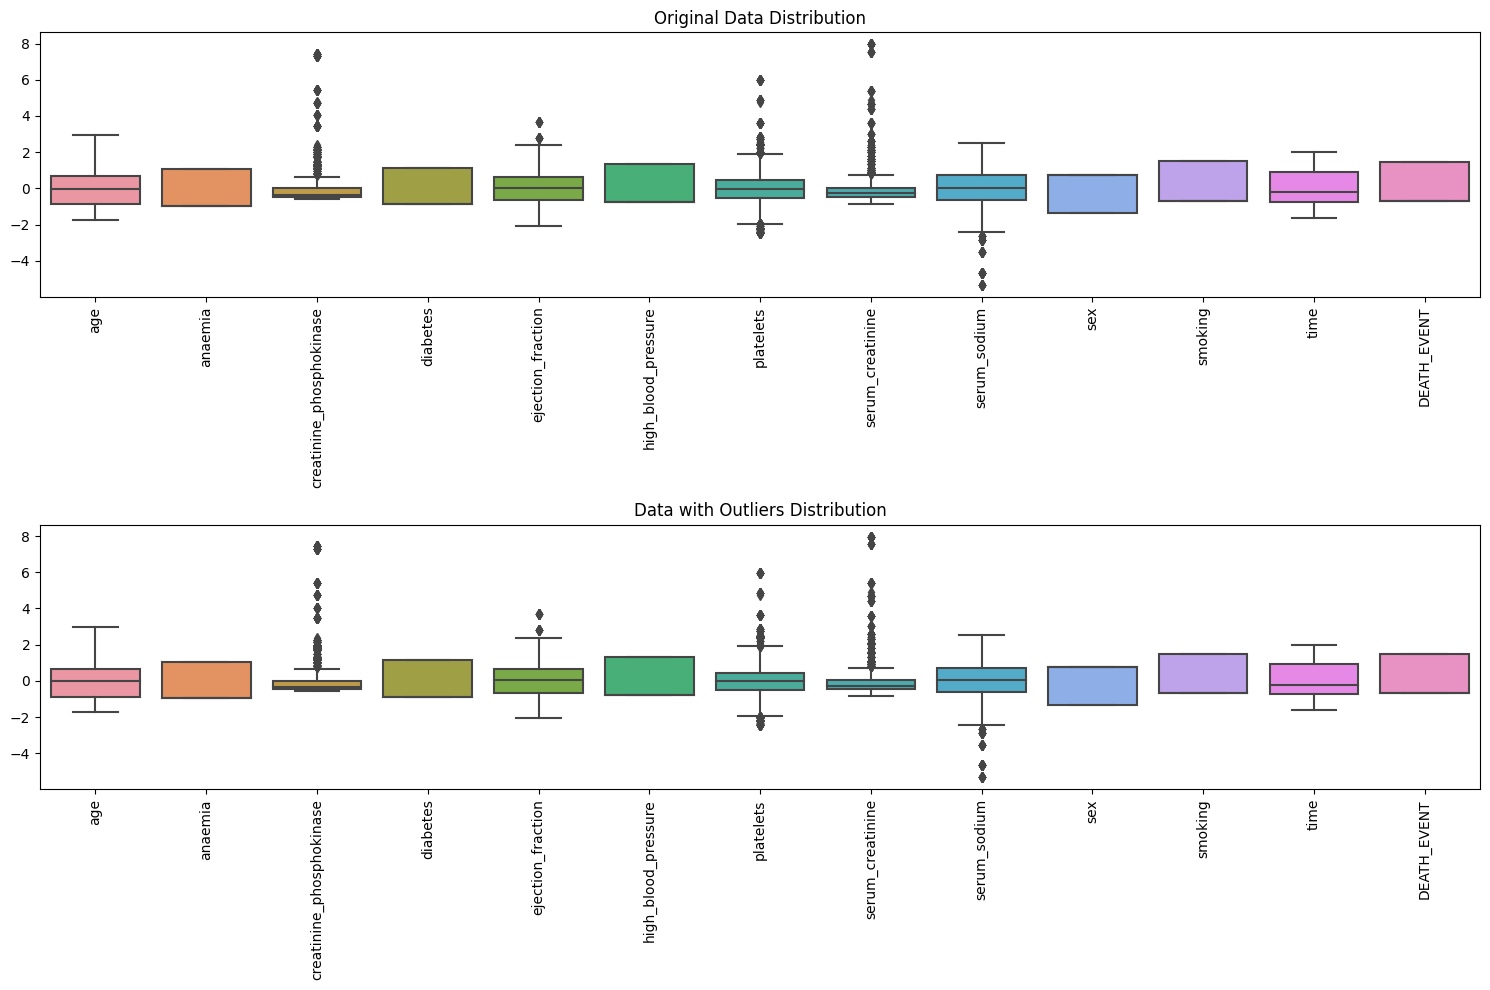

In [27]:
# Plot the distributions
def plot_distributions(original_data, data_with_outliers):
    plt.figure(figsize=(15, 10))

    # Plot original data distributions
    plt.subplot(2, 1, 1)
    sns.boxplot(data=original_data)
    plt.title('Original Data Distribution')
    plt.xticks(rotation=90)

    # Plot data with outliers distributions
    plt.subplot(2, 1, 2)
    sns.boxplot(data=data_with_outliers)
    plt.title('Data with Outliers Distribution')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_with_outliers_scaled = pd.DataFrame(scaler.fit_transform(data_with_outliers), columns=data.columns)

# Plot the distributions of scaled data
plot_distributions(data_scaled, data_with_outliers_scaled)